# Projeto Estatística Descritiva de Dados
## Lucas Natan Correia Couri e Mariama Oliveira

# Análise exploratória

In [361]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
InteractiveShell.ast_node_interactivity = 'all'

In [362]:
dados = pd.read_csv("dataset_stroke.csv")

In [363]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [364]:
dados.shape

(5110, 12)

## Pré-processamento de dados

In [365]:
dados.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Convertendos tipos "object" para "category"

In [366]:
dados['gender'] = dados['gender'].astype('category')
dados['ever_married'] = dados['ever_married'].astype('category')
dados['work_type'] = dados['work_type'].astype('category')
dados['Residence_type'] = dados['Residence_type'].astype('category')
dados['smoking_status'] = dados['smoking_status'].astype('category')
dados['hypertension'] = dados['hypertension'].astype('category')
dados['heart_disease'] = dados['heart_disease'].astype('category')
dados['stroke'] = dados['stroke'].astype('category')


In [367]:
dados[(dados['age']<2) & (dados['stroke']==0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
597,40639,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [368]:
dados.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


<AxesSubplot:>

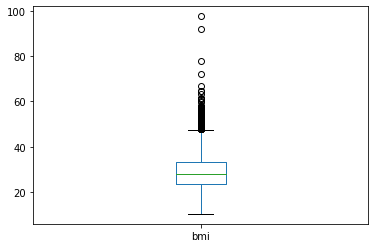

In [369]:
dados['bmi'].plot.box()

### **Verificando dados nulos**

In [370]:
dados.isnull().sum()/len(dados)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [371]:
dados['gender'].value_counts() 
dados['ever_married'].value_counts()
dados['work_type'].value_counts()
dados['Residence_type'].value_counts()
dados['smoking_status'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [372]:
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,4612,4834,4861
1,498,276,249


In [373]:
dados[(dados['bmi'].isnull()) & (dados['stroke']==1)].shape

(40, 12)

In [374]:
dados[(dados['stroke']==1)].shape

(249, 12)

### Iremos retirar as instâncias que apresentam valores nulos para bmi (IMC). Futuramente, iremos comparar se caso esse atributo for inputado, o classificador apresentará uma melhor performance.

In [375]:
dados.dropna(inplace = True)
#dados['bmi'] = dados['bmi'].fillna(dados['bmi'].mean())

In [376]:
dados[dados.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [377]:
dados[ ( dados['smoking_status']=="Unknown" ) & ( dados['stroke']==1 ) ].shape

(29, 12)

In [378]:
#dados.shape #4909
dados = dados[dados['smoking_status']!="Unknown"]

In [379]:
dados = dados[dados['gender']!="Other"]

## Discretizando variáveis contínuas

In [380]:
dados['faixaIdade'] = pd.cut(dados['age'], [0, 10, 25, 50, 75, 90])
dados['faixaIMC'] = pd.cut(dados['bmi'], [0, 18.5, 25, 30, 40, 100])
dados['faixaGlicose'] = pd.cut(dados['avg_glucose_level'], [0, 70, 100, 125, 300])
#https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380
dados['faixaIdade'] = dados['faixaIdade'].astype('category')
dados['faixaIMC'] = dados['faixaIMC'].astype('category')
dados['faixaGlicose'] = dados['faixaGlicose'].astype('category')


# Análise

Verificando distribuição dos atributos

In [381]:
# ax = sns.countplot(x="stroke", data=dados)
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


In [382]:
#dados['hypertension'] 
#dados['heart_disease']
#dados['stroke']
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,3017,3219,3245
1,408,206,180


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

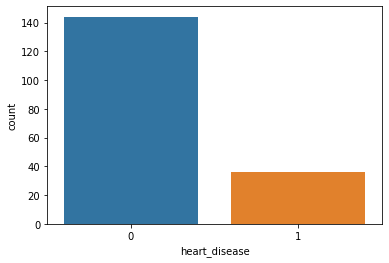

In [383]:
sns.countplot(x="heart_disease", data=dados[dados['stroke']==1])

<AxesSubplot:xlabel='age', ylabel='Count'>

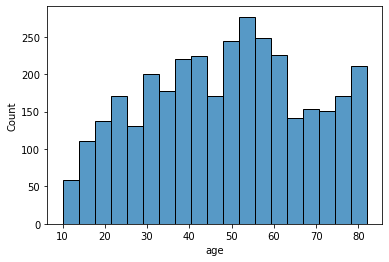

In [384]:
sns.histplot(data=dados, x="age")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

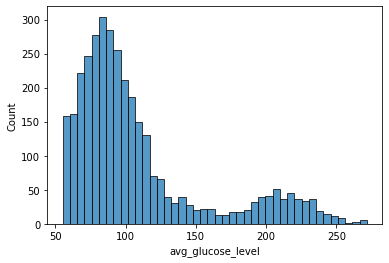

In [385]:
sns.histplot(data=dados, x="avg_glucose_level")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

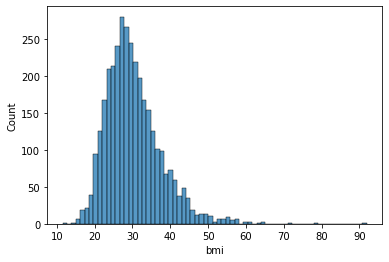

In [386]:
sns.histplot(data=dados, x="bmi")

<AxesSubplot:xlabel='age', ylabel='bmi'>

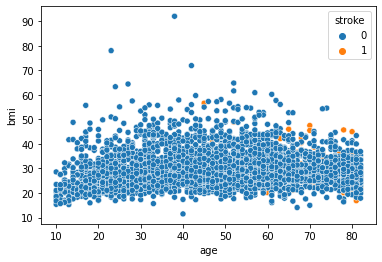

In [387]:
sns.scatterplot(data=dados, x="age", y="bmi", hue=dados['stroke'])

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

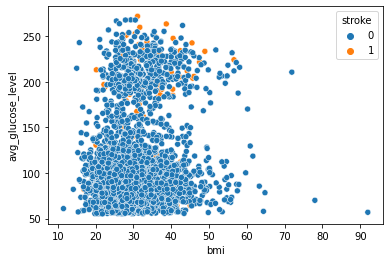

In [388]:
sns.scatterplot(data=dados, x="bmi", y="avg_glucose_level", hue=dados['stroke'])

In [389]:
### Fazer os graficos para as categoricas (4 plots por janela)
### Fazer os graficos para as categoricas apenas para stroke==1

In [390]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixaIdade,faixaIMC,faixaGlicose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(50, 75]","(30.0, 40.0]","(125, 300]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(75, 90]","(30.0, 40.0]","(100, 125]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(25, 50]","(30.0, 40.0]","(125, 300]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(75, 90]","(18.5, 25.0]","(125, 300]"
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(75, 90]","(25.0, 30.0]","(125, 300]"


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

<AxesSubplot:xlabel='hypertension', ylabel='count'>

<AxesSubplot:xlabel='faixaIdade', ylabel='count'>

<AxesSubplot:xlabel='faixaGlicose', ylabel='count'>

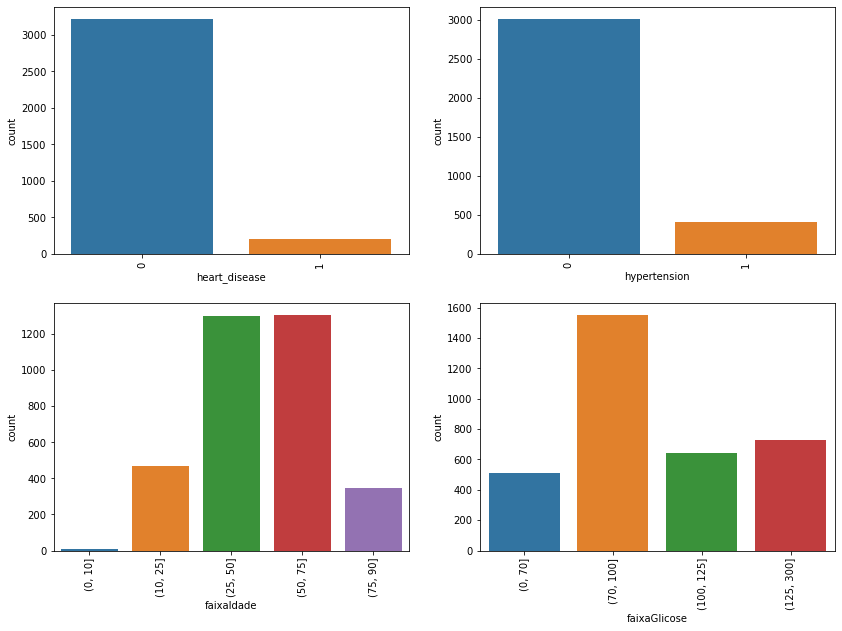

In [391]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

sns.countplot(ax=axes[0,0], x="heart_disease", data=dados)
axes[0,0].tick_params(rotation=90, axis='x')
#axes[0,0].set_title(nomes_series[0])
#axes[0,0].set_ylabel('Número Total de Twitts')
#axes[0,0].set_xlabel('Dia')

sns.countplot(ax=axes[0,1], x="hypertension", data=dados)
axes[0,1].tick_params(rotation=90, axis='x')
#axes[0,1].set_title(nomes_series[1])
#axes[0,1].set_ylabel('Número Total de Twitts')
#axes[0,1].set_xlabel('Dia')

sns.countplot(ax=axes[1,0], x="faixaIdade", data=dados)
axes[1,0].tick_params(rotation=90, axis='x')
#axes[1,0].set_title(nomes_series[2])
#axes[1,0].set_ylabel('Número Total de Twitts')
#axes[1,0].set_xlabel('Dia')

sns.countplot(ax=axes[1,1], x="faixaGlicose", data=dados)
axes[1,1].tick_params(rotation=90, axis='x')
#axes[1,1].set_title(nomes_series[3])
#axes[1,1].set_ylabel('Número Total de Twitts')
#axes[1,1].set_xlabel('Dia')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

<AxesSubplot:xlabel='hypertension', ylabel='count'>

<AxesSubplot:xlabel='faixaIdade', ylabel='count'>

<AxesSubplot:xlabel='faixaGlicose', ylabel='count'>

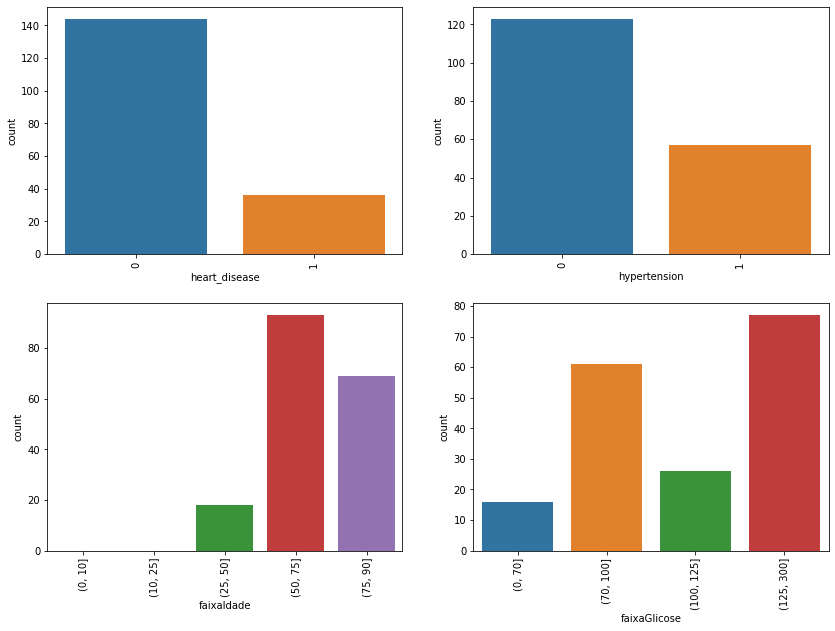

In [392]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

sns.countplot(ax=axes[0,0], x="heart_disease", data=dados[dados['stroke']==1])
axes[0,0].tick_params(rotation=90, axis='x')
#axes[0,0].set_title(nomes_series[0])
#axes[0,0].set_ylabel('Número Total de Twitts')
#axes[0,0].set_xlabel('Dia')

sns.countplot(ax=axes[0,1], x="hypertension", data=dados[dados['stroke']==1])
axes[0,1].tick_params(rotation=90, axis='x')
#axes[0,1].set_title(nomes_series[1])
#axes[0,1].set_ylabel('Número Total de Twitts')
#axes[0,1].set_xlabel('Dia')

sns.countplot(ax=axes[1,0], x="faixaIdade", data=dados[dados['stroke']==1])
axes[1,0].tick_params(rotation=90, axis='x')
#axes[1,0].set_title(nomes_series[2])
#axes[1,0].set_ylabel('Número Total de Twitts')
#axes[1,0].set_xlabel('Dia')

sns.countplot(ax=axes[1,1], x="faixaGlicose", data=dados[dados['stroke']==1])
axes[1,1].tick_params(rotation=90, axis='x')
#axes[1,1].set_title(nomes_series[3])
#axes[1,1].set_ylabel('Número Total de Twitts')
#axes[1,1].set_xlabel('Dia')

In [393]:
dados.corr(method='pearson')

,id,age,avg_glucose_level,bmi
id,1.000000,-0.003178,0.004135,-0.003581
age,-0.003178,1.000000,0.233974,0.079317
avg_glucose_level,0.004135,0.233974,1.000000,0.156675
bmi,-0.003581,0.079317,0.156675,1.000000


<AxesSubplot:>

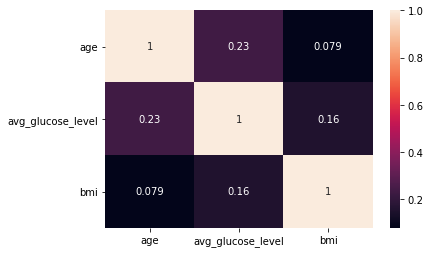

In [394]:
correlation_mat = dados.drop(columns = "id").corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [395]:
varCategoricas = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status', 'Residence_type', 'faixaIdade', 'faixaIMC', 'faixaGlicose']

pvalores = []

for variavel in varCategoricas:
    crosstab = pd.crosstab(dados["stroke"], dados[variavel])
    pvalor = stats.chi2_contingency(crosstab)[1]
    pvalores.append(pvalor)
    print(variavel, pvalor)

gender 0.5169941898164226
hypertension 1.158585663228229e-16
heart_disease 1.915166158182386e-15
ever_married 4.114765555930653e-05
work_type 0.012797151633768608
smoking_status 0.049062271297848944
Residence_type 0.7837084243991301
faixaIdade 8.74754958846977e-48
faixaIMC 0.3078160316983966
faixaGlicose 1.277924947059737e-11


In [396]:
crosstab, test_results, expected = rp.crosstab(dados["stroke"], dados["heart_disease"],
                                               test= "chi-square",
                                               expected_freqs = True,
                                               prop= "cell")

#crosstab
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,65.7357
1,p-value =,0.0000
2,Cramer's phi =,0.1385


## Discretizando variáveis contínuas

In [397]:
dados['faixaIdade'] = pd.cut(dados['age'], [0, 10, 25, 50, 75, 90])

In [398]:
dados['faixaIMC'] = pd.cut(dados['bmi'], [0, 18.5, 25, 30, 40, 100])

In [399]:
dados['faixaGlicose'] = pd.cut(dados['avg_glucose_level'], [0, 70, 100, 125, 300])
#https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

In [400]:
dados['faixaIdade'] = dados['faixaIdade'].astype('category')
dados['faixaIMC'] = dados['faixaIMC'].astype('category')
dados['faixaGlicose'] = dados['faixaGlicose'].astype('category')

# Classificador Naive Bayes

## Com scikit

Separando em dados de treinamento e teste

In [401]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixaIdade,faixaIMC,faixaGlicose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(50, 75]","(30.0, 40.0]","(125, 300]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(75, 90]","(30.0, 40.0]","(100, 125]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(25, 50]","(30.0, 40.0]","(125, 300]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(75, 90]","(18.5, 25.0]","(125, 300]"
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(75, 90]","(25.0, 30.0]","(125, 300]"


In [402]:
X = dados.drop(columns='stroke')

y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Codificando as variáveis

In [403]:
X_trainNB = X_train
X_testNB = X_test
#X_trainNB
#X_testNB

In [404]:
cat_columns = X_trainNB.select_dtypes(['category']).columns
X_trainNB[cat_columns] = X_trainNB[cat_columns].apply(lambda x: x.cat.codes)

cat_columns = X_testNB.select_dtypes(['category']).columns
X_testNB[cat_columns] = X_testNB[cat_columns].apply(lambda x: x.cat.codes)

X_trainNB = X_trainNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])
X_testNB = X_testNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])




C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [405]:
# With sklearn
ctgrclNB = CategoricalNB(alpha=1)
ctgrclNB.fit(X_trainNB, y_train)
ctgrclNB.predict_proba(np.array(X_testNB))

CategoricalNB(alpha=1)

array([[9.74888173e-01, 2.51118271e-02],
       [9.57908017e-01, 4.20919833e-02],
       [9.29867976e-01, 7.01320238e-02],
       ...,
       [8.70348123e-01, 1.29651877e-01],
       [9.99166819e-01, 8.33181111e-04],
       [9.93550315e-01, 6.44968529e-03]])

In [406]:
y_pred = ctgrclNB.predict(np.array(X_testNB))

In [407]:
f1_score(y_test, y_pred, average=None)
# accuracy_score(y_test, y_pred)

#res_df = pd.DataFrame(resultado_predicao, y_test)

array([0.9592668 , 0.13043478])

In [408]:
confusion_matrix(y_test, y_pred) #tn, fp, fn, tp

array([[942,  27],
       [ 53,   6]], dtype=int64)

In [409]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.97      0.96       969
      stroke       0.18      0.10      0.13        59

    accuracy                           0.92      1028
   macro avg       0.56      0.54      0.54      1028
weighted avg       0.90      0.92      0.91      1028



## Sem scikit

In [410]:
trainNB = X_trainNB
trainNB['stroke'] = y_train
trainNB.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,faixaIdade,faixaIMC,faixaGlicose,stroke
4166,1,0,0,1,2,0,1,2,1,2,0
4324,0,0,0,0,3,0,1,4,3,3,0
1444,0,0,0,0,2,0,2,1,0,2,0
663,0,0,0,1,2,0,2,2,1,1,0
2444,0,0,0,1,2,1,2,4,2,1,0


In [411]:
def calculoProbCond(entradaTestar, conjuntoTreino):
    
    arrayProbabilidades = [[],[]]
    for nomeColuna in conjuntoTreino.columns: #exceto stroke?

        if nomeColuna!="stroke":   
            valorTestar = entradaTestar[nomeColuna] #Ver se precisa passar o valor da linha (0)
 
            atributoNao = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==0)]) / len(conjuntoTreino[conjuntoTreino['stroke']==0])
            atributoSim = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==1)]) / len(conjuntoTreino[conjuntoTreino['stroke']==1])

            arrayProbabilidades[0].append(atributoNao)
            arrayProbabilidades[1].append(atributoSim)

        #genderp0 = (len(XcomY[(XcomY['gender']==1)&(XcomY['stroke']==0)])+1) / (len(XcomY[XcomY['Y']==0])+(1*5))
        #ctgrclX15p1 = (len(XcomY[(XcomY['gender']==1)&(XcomY['stroke']==1)])+1) / (len(XcomY[XcomY['Y']==1])+(1*5))


    return arrayProbabilidades




In [412]:
def calculoProbabilidadePred(listaProbabilidades, conjuntoTreino):

    Likelihood0 = np.prod(listaProbabilidades[0])
    Likelihood1 = np.prod(listaProbabilidades[1])

    ProbStroke0 = len(conjuntoTreino[conjuntoTreino['stroke']==0])/len(conjuntoTreino)
    ProbStroke1 = len(conjuntoTreino[conjuntoTreino['stroke']==1])/len(conjuntoTreino)


    ProbTotal = (ProbStroke0*Likelihood0) + (ProbStroke1*Likelihood1)

    probNao = (ProbStroke0*Likelihood0)/ProbTotal
    probSim = (ProbStroke1*Likelihood1)/ProbTotal
    return 0 if probNao>probSim else 1

In [413]:
##Iterar sobre a base de teste
def predictStroke(conjuntoTreino, conjuntoTeste) :

    arrayPred = []
    ##Loop que determina todas as predicoes
    for index, linha in conjuntoTeste.iterrows():
        resposta = calculoProbPosteriori(linha, conjuntoTreino)
        predicao = calculoProbabilidadePred(resposta, conjuntoTreino)
        print(index , ": ", predicao)
        arrayPred.append(predicao)
   
    return arrayPred

In [414]:
pred_Y  =  predictStroke(trainNB, X_test)


1133 :  0
2085 :  0
3083 :  0
1533 :  0
636 :  0
3190 :  0
1969 :  0
3547 :  0
266 :  0
4375 :  0
4608 :  0
1518 :  0
2598 :  0
3157 :  0
1943 :  0
2984 :  0
661 :  0
4236 :  0
5008 :  0
1216 :  0
42 :  1
3603 :  0
2989 :  0
3579 :  0
4386 :  0
232 :  0
1552 :  0
4176 :  0
69 :  0
96 :  0
3799 :  0
979 :  0
652 :  0
686 :  0
4749 :  0
1255 :  0
1190 :  0
4169 :  0
4085 :  0
1204 :  0
4449 :  0
407 :  0
2547 :  0
4351 :  0
359 :  0
2100 :  0
187 :  1
4554 :  0
2647 :  0
4621 :  0
4057 :  0
2190 :  1
4947 :  0
1491 :  0
4190 :  0
1347 :  0
4739 :  0
3309 :  0
1892 :  0
257 :  0
2404 :  0
2293 :  0
3145 :  0
2558 :  0
2168 :  0
2635 :  0
2751 :  0
928 :  0
3235 :  0
2463 :  0
4434 :  0
4551 :  0
2485 :  0
2818 :  0
71 :  0
1722 :  0
1120 :  0
1250 :  0
1620 :  0
4632 :  0
2682 :  0
1090 :  0
1556 :  0
2829 :  0
2208 :  0
5085 :  0
2585 :  0
1173 :  0
22 :  0
580 :  0
644 :  0
1807 :  0
455 :  0
4858 :  0
1627 :  0
3159 :  0
4051 :  0
440 :  0
2703 :  0
4354 :  0
3484 :  0
268 :  0
1127 : 

In [415]:
pred_Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [416]:
accuracy_score(y_test, pred_Y)

0.9221789883268483

In [417]:
f1_score(y_test, pred_Y, average=None)
#([0.9604299 , 0.12903226]) resultado do scikit

array([0.9592668 , 0.13043478])

In [418]:
confusion_matrix(y_test, pred_Y) #tn, fp, fn, tp f1=tp/tp+1/2(fp+fn) f0=942/942+1/2(27+53) e f1=6/6+1/2(27+53)

array([[942,  27],
       [ 53,   6]], dtype=int64)

In [419]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_Y, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.97      0.96       969
      stroke       0.18      0.10      0.13        59

    accuracy                           0.92      1028
   macro avg       0.56      0.54      0.54      1028
weighted avg       0.90      0.92      0.91      1028



## KNN

In [420]:
X_trainKN = X_train.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
X_testKN = X_test.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])

In [421]:
train_dummies = pd.get_dummies(X_trainKN[["work_type", "smoking_status"]].astype(str))
test_dummies = pd.get_dummies(X_testKN[["work_type", "smoking_status"]].astype(str))

In [422]:
X_trainKN = X_trainKN.join(train_dummies)
X_testKN = X_testKN.join(test_dummies)

In [423]:
knnClassifier = KNeighborsClassifier(n_neighbors=1)
knnClassifier.fit(X_trainKN, y_train)
pred_KN = knnClassifier.predict(X_testKN)


KNeighborsClassifier(n_neighbors=1)

In [424]:
f1_score(y_test, pred_KN, average=None)

array([0.95213587, 0.17699115])

In [425]:
accuracy_score(y_test, pred_KN)

0.9095330739299611

In [426]:
confusion_matrix(y_test, pred_KN) #tn, fp, fn, tp

array([[925,  44],
       [ 49,  10]], dtype=int64)

In [427]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_KN, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.95      0.95       969
      stroke       0.19      0.17      0.18        59

    accuracy                           0.91      1028
   macro avg       0.57      0.56      0.56      1028
weighted avg       0.91      0.91      0.91      1028



In [428]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_KN).ravel()
tn, fp, fn, tp

(925, 44, 49, 10)

In [429]:
len(dados[dados['stroke']==1])
len(dados)#[dados['stroke']==1])

180

3425

# Experimento balanceamento

In [430]:
avcSim = dados[dados['stroke']==1]
avcNao = dados[dados['stroke']==0]
avcNao = avcNao.sample(frac=0.0555, replace=False, random_state=195)

In [431]:
len(avcNao)
len(avcSim)

180

180

In [432]:
balanceado = avcSim.append(avcNao)

In [433]:
Xb = balanceado.drop(columns='stroke')

yb = balanceado['stroke']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Naive Bayes

## Knn